In [30]:
import pandas as pd
import numpy as np
#import re
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('Tensiometer 080921 summary.csv', sep=' ', header = None)
df.head

<bound method NDFrame.head of           0      1    2  3          4   5       6
0   Contact  angle  [°]  /  (9040MCC6  1)  36.457
1   Contact  angle  [°]  /  (9040MCC6  2)  43.625
2   Contact  angle  [°]  /  (9040MCC6  3)  40.183
3   Contact  angle  [°]  /  (9040MCC6  4)  53.028
4   Contact  angle  [°]  /  (9040MAST  1)  43.574
..      ...    ...  ... ..        ...  ..     ...
58  Contact  angle  [°]  /  (8040MAST  4)  52.315
59  Contact  angle  [°]  /   (8040MG8  1)  58.213
60  Contact  angle  [°]  /   (8040MG8  2)  48.194
61  Contact  angle  [°]  /   (8040MG8  3)  63.394
62  Contact  angle  [°]  /   (8040MG8  4)  51.002

[63 rows x 7 columns]>

In [37]:
df['Feature'] = df[4].str.replace('\(','').str.strip()
df['Contact Angle (°)'] = df[6].astype(float)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,Feature,Contact Angle (°)
0,Contact,angle,[°],/,(9040MCC6,1),36.457,9040MCC6,36.457
1,Contact,angle,[°],/,(9040MCC6,2),43.625,9040MCC6,43.625
2,Contact,angle,[°],/,(9040MCC6,3),40.183,9040MCC6,40.183
3,Contact,angle,[°],/,(9040MCC6,4),53.028,9040MCC6,53.028
4,Contact,angle,[°],/,(9040MAST,1),43.574,9040MAST,43.574


In [38]:
df = df.drop([0,1,2,3,4,5,6],axis = 1)
df = df.sort_values(['Feature'])
df

,Feature,Contact Angle (°)
44,10035MAST,40.372
45,10035MAST,43.756
46,10035MAST,50.792
40,10035MCC6,47.818
42,10035MCC6,36.966
...,...,...
8,9040MG8,36.492
39,CTRL,50.898
38,CTRL,30.882
37,CTRL,51.185


In [31]:
sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
iris = pd.melt(iris, "species", var_name="measurement")
iris

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


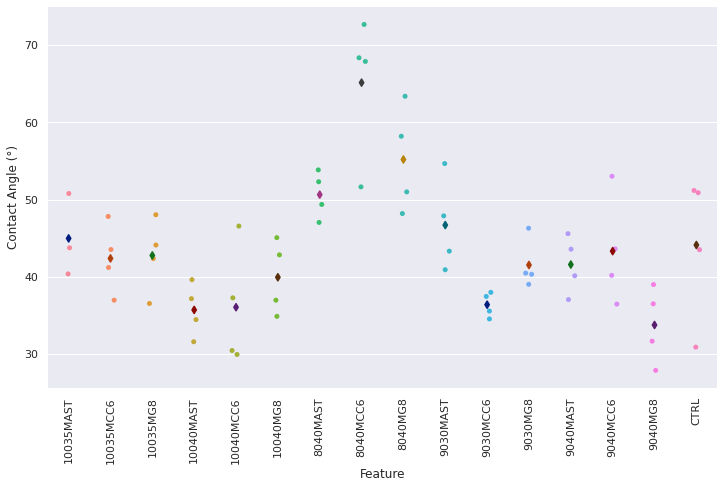

In [50]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)


# Show each observation with a scatterplot
sns.stripplot(x="Feature", y="Contact Angle (°)",
              data=df, dodge=True, alpha=1, zorder=1)

# Show the conditional means
sns.pointplot(x="Feature", y="Contact Angle (°)", 
              data=df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(12,7)})

In [27]:
df_group = df.groupby('Feature').agg({'Contact Angle (°)':(np.nanmean, np.nanstd)}).round(1)
df_group

Contact Angle (°)       
                    nanmean nanstd
Feature                           
10035MAST              45.0    5.3
10035MCC6              42.4    4.5
10035MG8               42.8    4.8
10040MAST              35.7    3.5
10040MCC6              36.1    7.8
10040MG8               39.9    4.8
8040MAST               50.6    3.0
8040MCC6               65.2    9.3
8040MG8                55.2    6.9
9030MAST               46.7    6.1
9030MCC6               36.4    1.6
9030MG8                41.5    3.2
9040MAST               41.6    3.8
9040MCC6               43.3    7.1
9040MG8                33.8    5.0
CTRL                   44.1    9.5

def seperate_num(row):
    match = re.match(r"([0-9]+)([a-z]+)([0-9]*)", featurename, re.I)
    if match:
        items = match.groups()
print(items)


for row in len(df):
    


>> ("foofo", "21")
Share
Follow

   
   
Export to exel:

In [75]:
#df_group.to_excel('Tensiometer result analysis 080921.xlsx')

In [28]:
df_9040 = df.iloc[0:12].append(df.iloc[36:40], sort=False)
df_9040

,Feature,Contact Angle (°)
0,9040MCC6,36.457
1,9040MCC6,43.625
2,9040MCC6,40.183
3,9040MCC6,53.028
4,9040MAST,43.574
5,9040MAST,40.133
6,9040MAST,45.584
7,9040MAST,37.045
8,9040MG8,36.492
9,9040MG8,27.868
